## Code de base

In [ ]:
    # Equations correcte du modèle

    eqs = '''
dV/dt = (g_l * ((E_l + z) - V) * ((V_t - beta * z) - V) - w -gp * z + I_s)/Cm : volt
dw/dt = (a * (V - (E_l + z)) - w)/tau_w : amp
dz/dt = epsilon * (Z0 - V - z)/tau_z : volt
'''
gl, el, b, vt, cm,a,reft, vreset, tauw
    # Mécanisme de reset après un spike
    if V >= VD:
        V = VR
        w += b

    return [dVdt, dwdt, dzdt]


w = g_l * ((E_l + z) - V) * ((V_t - beta * z) - V) - gp * z + Is

w =  a * (V - (E_l + z))

z = Z0 - V

#nullclines à ploter, v prend plusieurs valeurs (-100 et -30 à vérifier)

w = g_l * ((E_l + z) - V) * ((V_t - beta * z) - V) - gp * z + Is

w =  a * (V - (E_l + z))

z = Z0 - V


#V resting state, pas atteindre z0 : régime permanent atteint par z autour de petite valeur
#attention Z pas égal à Z0=-50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
g_l = 10e-6  # nanosiemens/ mV
E_l = -65e-3  # V
V_t = -55e-3  # V
beta = 0.5
gp = 10e-12  # S
I_s = 0  # A # converions à savoir
a = 10e-9  # S
Z0 = -65e-3  # V

# Plage de valeurs pour V
V = np.linspace(-100e-3, -10e-3, 500)  # Converti en V

# Choix de z (peut tester plusieurs valeurs)
z = 30e-3   # Exemple avec z = Z0

# Nullcline de w (dw/dt = 0)
w_nullcline_w = a * (V - (E_l + z))

# Nullcline de V (dV/dt = 0)
w_nullcline_V = g_l * ((E_l + z) - V) * ((V_t - beta * z) - V) - gp * z + I_s

# Tracé des nullclines
plt.figure(figsize=(8, 6))
plt.plot(V * 1e3, w_nullcline_w * 1e9, label='Nullcline de w (dw/dt=0)', linestyle='--')
plt.plot(V * 1e3, w_nullcline_V * 1e9, label='Nullcline de V (dV/dt=0)')

# Configuration du graphe
plt.xlabel("V (mV)")
plt.ylabel("w (nA)")
plt.title("Nullclines dans le plan (V, w)")
plt.legend()
plt.grid()
plt.show()

## NULLCLINES

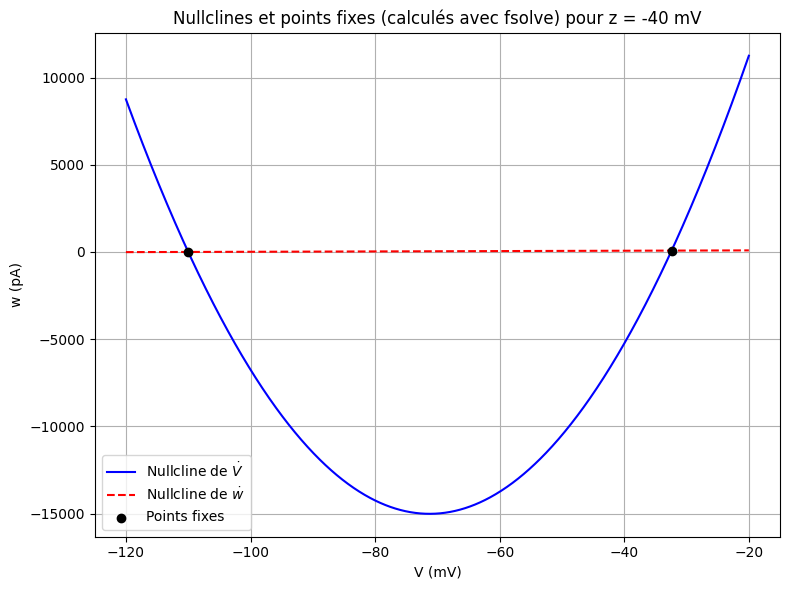

Point fixe 1 : V = -109.999 mV, w = 0.001 pA
Point fixe 2 : V = -32.401 mV, w = 77.599 pA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Paramètres
Cm = 200e-12
g_l = 10e-6
E_l = -65e-3
V_t = -55e-3
gp = 10e-12
I_s = 0
a = 1e-9
beta = 0.5
z = -45e-3  # valeur fixée

# Définir la fonction à annuler : w_nullcline_V - w_nullcline_w
def nullcline_diff(V):
    w_V = g_l * ((E_l + z - V) * (V_t - beta * z - V)) - gp * z + I_s
    w_w = a * (V - (E_l + z))
    return w_V - w_w

# Estimations initiales proches des intersections visuelles
V0_1 = -110e-3
V0_2 = -30e-3

# Trouver les racines (valeurs de V aux points fixes)
V_fp1 = fsolve(nullcline_diff, V0_1)[0]
V_fp2 = fsolve(nullcline_diff, V0_2)[0]

# Calculer w pour ces V
w_fp1 = g_l * ((E_l + z - V_fp1) * (V_t - beta * z - V_fp1)) - gp * z + I_s
w_fp2 = g_l * ((E_l + z - V_fp2) * (V_t - beta * z - V_fp2)) - gp * z + I_s

# Tracé des nullclines
V_vals = np.linspace(-120e-3, -20e-3, 1000)
w_nullcline_V = g_l * ((E_l + z - V_vals) * (V_t - beta * z - V_vals)) - gp * z + I_s
w_nullcline_w = a * (V_vals - (E_l + z))

plt.figure(figsize=(8, 6))
plt.plot(V_vals * 1e3, w_nullcline_V * 1e12, label="Nullcline de $\dot{V}$", color="blue")
plt.plot(V_vals * 1e3, w_nullcline_w * 1e12, label="Nullcline de $\dot{w}$", color="red", linestyle="--")

# Points fixes
plt.scatter([V_fp1 * 1e3, V_fp2 * 1e3], [w_fp1 * 1e12, w_fp2 * 1e12],
            color='black', zorder=5, label='Points fixes')

# Mise en forme
plt.xlabel("V (mV)")
plt.ylabel("w (pA)")
plt.title("Nullclines et points fixes (calculés avec fsolve) pour z = -40 mV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des résultats numériques
print(f"Point fixe 1 : V = {V_fp1*1e3:.3f} mV, w = {w_fp1*1e12:.3f} pA")
print(f"Point fixe 2 : V = {V_fp2*1e3:.3f} mV, w = {w_fp2*1e12:.3f} pA")


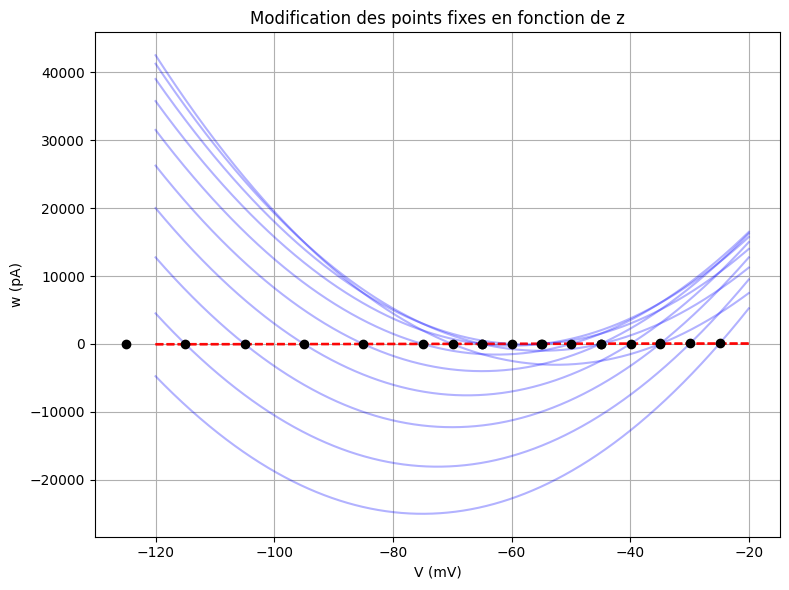

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Paramètres fixes
Cm = 200e-12
g_l = 10e-6
E_l = -65e-3
V_t = -55e-3
gp = 10e-12
I_s = 0
a = 1e-9
beta = 0.5

# Définir la fonction à annuler : w_nullcline_V - w_nullcline_w
def nullcline_diff(V, z):
    w_V = g_l * ((E_l + z - V) * (V_t - beta * z - V)) - gp * z + I_s
    w_w = a * (V - (E_l + z))
    return w_V - w_w

# Plage des valeurs de z
z_vals = np.linspace(-60e-3, 30e-3, 10)  # De -60 mV à 30 mV
V0_1 = -110e-3  # Estimation initiale pour fsolve
V0_2 = -30e-3   # Estimation initiale pour fsolve

# Tracé
plt.figure(figsize=(8, 6))

for z in z_vals:
    # Résoudre pour les points fixes
    V_fp1 = fsolve(nullcline_diff, V0_1, args=(z))[0]
    V_fp2 = fsolve(nullcline_diff, V0_2, args=(z))[0]

    # Calculer w pour ces V
    w_fp1 = g_l * ((E_l + z - V_fp1) * (V_t - beta * z - V_fp1)) - gp * z + I_s
    w_fp2 = g_l * ((E_l + z - V_fp2) * (V_t - beta * z - V_fp2)) - gp * z + I_s

    # Tracer les nullclines
    V_vals = np.linspace(-120e-3, -20e-3, 1000)
    w_nullcline_V = g_l * ((E_l + z - V_vals) * (V_t - beta * z - V_vals)) - gp * z + I_s
    w_nullcline_w = a * (V_vals - (E_l + z))

    plt.plot(V_vals * 1e3, w_nullcline_V * 1e12, color='blue', alpha=0.3)  # Courbe de V
    plt.plot(V_vals * 1e3, w_nullcline_w * 1e12, color='red', linestyle="--", alpha=0.3)  # Courbe de w

    # Afficher les points fixes
    if np.isreal(V_fp1) and np.isreal(w_fp1):  # Vérifier que c'est un nombre réel
        plt.scatter(V_fp1 * 1e3, w_fp1 * 1e12, color='black', zorder=5)  # Premier point fixe
    if np.isreal(V_fp2) and np.isreal(w_fp2):  # Vérifier que c'est un nombre réel
        plt.scatter(V_fp2 * 1e3, w_fp2 * 1e12, color='black', zorder=5)  # Deuxième point fixe

# Mise en forme
plt.xlabel("V (mV)")
plt.ylabel("w (pA)")
plt.title("Modification des points fixes en fonction de z")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Paramètres fixes
Cm = 200e-12
g_l = 10e-6
E_l = -65e-3
V_t = -55e-3
gp = 10e-12
I_s = 0
a = 1e-9
beta = 0.5

# Définir la fonction à annuler : w_nullcline_V - w_nullcline_w
def nullcline_diff(V, z):
    w_V = g_l * ((E_l + z - V) * (V_t - beta * z - V)) - gp * z + I_s
    w_w = a * (V - (E_l + z))
    return w_V - w_w

# Plage des valeurs de z
z_vals = np.linspace(-60e-3, 30e-3, 100)  # De -60 mV à 30 mV, plus d'échantillons pour plus de précision
V0_1 = -110e-3  # Estimation initiale pour fsolve
V0_2 = -30e-3   # Estimation initiale pour fsolve

# Initialisation
collapse_z = None

# Boucle pour tester chaque valeur de z
for z in z_vals:
    try:
        # Résoudre pour les points fixes
        V_fp1 = fsolve(nullcline_diff, V0_1, args=(z))[0]
        V_fp2 = fsolve(nullcline_diff, V0_2, args=(z))[0]

        # Si les deux solutions sont réelles, on continue
        if np.isreal(V_fp1) and np.isreal(V_fp2):
            continue
        else:
            collapse_z = z
            break  # Si les solutions deviennent complexes, on arrête la boucle
    except:
        collapse_z = z
        break  # En cas d'exception (par exemple, divergence), on enregistre et arrête

# Affichage du résultat
if collapse_z is not None:
    print(f"Les points fixes disparaissent pour z = {collapse_z * 1e3:.2f} mV.")
else:
    print("Les points fixes restent valides pour toutes les valeurs de z dans l'intervalle.")


Les points fixes restent valides pour toutes les valeurs de z dans l'intervalle.


## Simulation brian

In [ ]:
!pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.8 MB/s eta 0:00:00


WARNING    'z' is an internal variable of group 'neurongroup', but also exists in the following namespaces: group-specific ,run. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    neurongroup's variable 'V' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup's variable 'z' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup's variable 'w' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


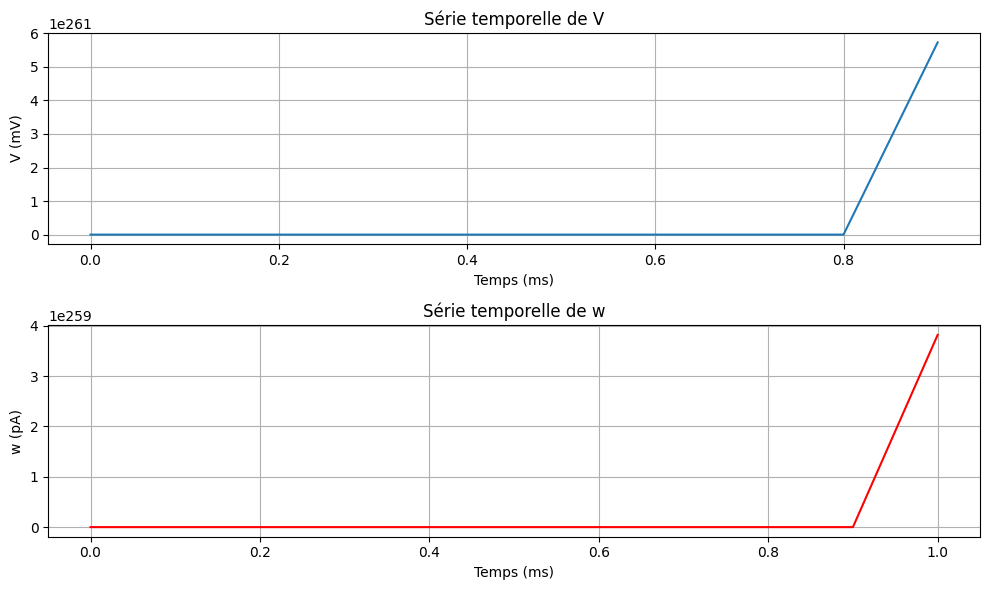

In [ ]:
from brian2 import *

start_scope()
# Paramètres
g_l = 10e-6 * siemens / volt
E_l = -65 * mV
V_t = -55 * mV
gp = 10e-12 * siemens
I_s = 0 * pA
a = 10 * nS
z = -40 * mV
Cm = 10 * pF
tau_w = 150 * ms
b = 60 * pA
beta = 0.5
epsilon = 1e-3  # Valeur d'exemple pour epsilon
Z0 = -50 * mV  # Valeur initiale pour Z
tau_z = 100 * ms  # Temps caractéristique de la dynamique de z

# Définition des équations différentielles
eqs = '''
dV/dt = (g_l * ((E_l + z) - V) * ((V_t - beta * z) - V) - w - gp * z + I_s) / Cm : volt
dw/dt = (a * (V - (E_l + z)) - w) / tau_w : amp
dz/dt = epsilon * (Z0 - V - z) / tau_z : volt
'''

# Définition du modèle neuronal
neurons = NeuronGroup(1, eqs, method='euler', namespace={'z': z, 'Z0': Z0, 'epsilon': epsilon})

# Initialisation des variables
neurons.V = -65 * mV  # Valeur initiale pour V
neurons.w = 0 * pA  # Valeur initiale pour w
neurons.z = z  # Valeur initiale pour z

# Enregistrement des valeurs de V et w pour la visualisation
monitor = StateMonitor(neurons, ['V', 'w'], record=True)

# Simulation
run(500 * ms)  # Durée de la simulation

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(monitor.t / ms, monitor.V[0] / mV, label='V (mV)')  # Accessing the first neuron
plt.xlabel('Temps (ms)')
plt.ylabel('V (mV)')
plt.title('Série temporelle de V')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(monitor.t / ms, monitor.w[0] / pA, label='w (pA)', color='red')  # Accessing the first neuron
plt.xlabel('Temps (ms)')
plt.ylabel('w (pA)')
plt.title('Série temporelle de w')
plt.grid(True)

plt.tight_layout()
plt.show()


MAJ

Aucun point fixe trouvé.


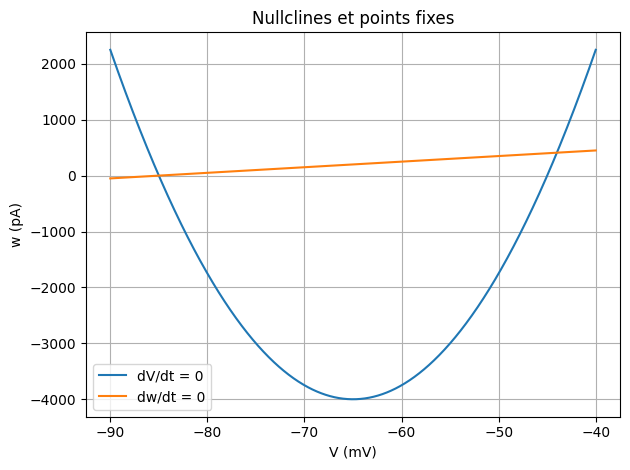

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.constants import milli, pico, nano

# Unités
mV = milli
pA = pico
nS = nano

# Paramètres du modèle
g_l = 10e-6      # S/V
E_l = -65 * mV
V_t = -55 * mV
gp = 10e-12      # S
I_s = 0 * pA
a = 10 * nS
z = -20 * mV
Cm = 10e-12      # F
tau_w = 150e-3   # s
beta = 0.5

# Nullclines
def w_nullcline_V(V):  # dV/dt = 0
    return g_l * (E_l + z - V) * (V_t - beta * z - V) - gp * z + I_s

def w_nullcline_w(V):  # dw/dt = 0
    return a * (V - (E_l + z))

def fixed_point_eq(V):
    return (w_nullcline_w(V) - w_nullcline_V(V)) / pA  # on divise pour avoir une échelle raisonnable

# Recherche des points fixes
V_range = np.linspace(-0.090, -0.040, 500)  # plage en volt = [-90 mV, -40 mV]
fixed_points = []

for V0 in V_range:
    V_fp = fsolve(fixed_point_eq, V0)[0]
    w_fp = w_nullcline_w(V_fp)
    # Évite doublons
    if not any(np.isclose(V_fp, pt[0], atol=1e-6) for pt in fixed_points):
        fixed_points.append((V_fp, w_fp))

# Jacobien
def jacobian(V_fp, w_fp):
    dfdV = (1 / Cm) * (-g_l * (V_t - beta * z - V_fp) - g_l * (E_l + z - V_fp))
    dfdw = -1 / Cm
    dgdV = a / tau_w
    dgdw = -1 / tau_w
    return np.array([[dfdV, dfdw], [dgdV, dgdw]])

# Affichage des résultats
if not fixed_points:
    print("Aucun point fixe trouvé.")
else:
    for i, (V_fp, w_fp) in enumerate(fixed_points):
        J = jacobian(V_fp, w_fp)
        trace = np.trace(J)
        det = np.linalg.det(J)
        eigvals = np.linalg.eigvals(J)

        print(f"\n--- Point fixe #{i+1} ---")
        print(f"V = {V_fp/mV:.2f} mV, w = {w_fp/pA:.2f} pA")
        print(f"Trace τ = {trace:.3e}, Déterminant Δ = {det:.3e}")
        print(f"Valeurs propres : {eigvals}")

        if det < 0:
            print("→ **Selle** (instable)")
        elif trace**2 < 4 * det:
            print("→ **Foyer** (spirale) " + ("stable" if trace < 0 else "instable"))
        else:
            print("→ **Nœud** " + ("stable" if trace < 0 else "instable"))

V_plot = np.linspace(-0.090, -0.040, 1000)
plt.plot(V_plot / mV, w_nullcline_V(V_plot) / pA, label="dV/dt = 0")
plt.plot(V_plot / mV, w_nullcline_w(V_plot) / pA, label="dw/dt = 0")

for V_fp, w_fp in fixed_points:
    plt.plot(V_fp / mV, w_fp / pA, 'ro')

plt.xlabel("V (mV)")
plt.ylabel("w (pA)")
plt.title("Nullclines et points fixes")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


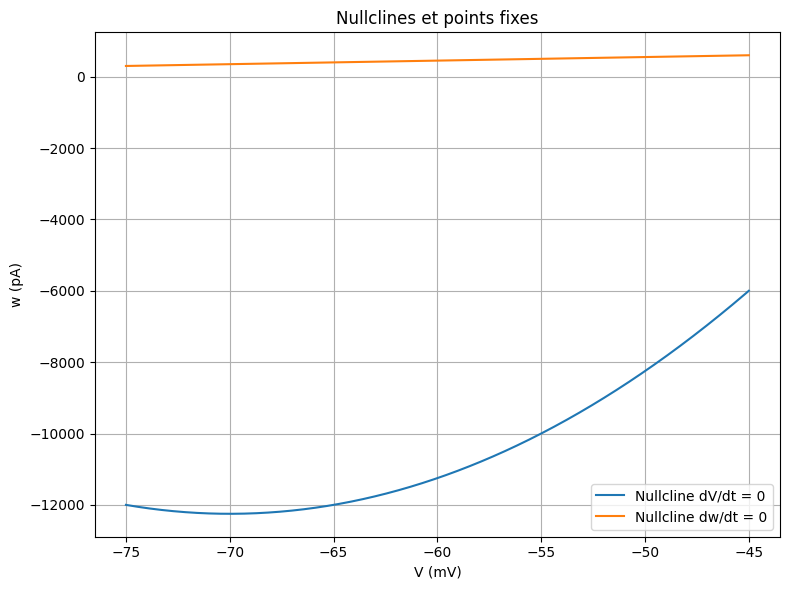

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.constants import milli, micro, nano, pico

# Conversion d’unités
mV = milli
pA = pico
nS = nano
pF = pico

# Paramètres donnés
g_l = 10e-6  # S/V
E_l = -65 * mV
V_t = -55 * mV
gp = 10e-12  # S
I_s = 0 * pA
a = 10 * nS  # = 10e-9 S
z = -40 * mV
Cm = 10 * pF  # = 10e-12 F
tau_w = 150e-3  # s
beta = 0.5

# Nullclines
def w_nullcline_V(V):
    return g_l * (E_l + z - V) * (V_t - beta * z - V) - gp * z + I_s

def w_nullcline_w(V):
    return a * (V - (E_l + z))

# Équation pour point fixe : w(V) = w(V)
def fixed_point_eq(V):
    return w_nullcline_w(V) - w_nullcline_V(V)

# Recherche numérique des points fixes
V_guesses = np.linspace(E_l - 10 * mV, V_t + 10 * mV, 500)
fixed_points = []
for V0 in V_guesses:
    try:
        V_fp = fsolve(fixed_point_eq, V0)[0]
        w_fp = w_nullcline_w(V_fp)
        if not any(np.isclose(V_fp, v[0], atol=1e-6) for v in fixed_points):
            fixed_points.append((V_fp, w_fp))
    except:
        continue

# Analyse de stabilité
for i, (V_fp, w_fp) in enumerate(fixed_points):
    dfdV = (1 / Cm) * (-g_l * (V_t - beta * z - V_fp) - g_l * (E_l + z - V_fp))
    dfdw = -1 / Cm
    dgdV = a / tau_w
    dgdw = -1 / tau_w

    J = np.array([[dfdV, dfdw],
                  [dgdV, dgdw]])

    trace = np.trace(J)
    det = np.linalg.det(J)
    eigvals = np.linalg.eigvals(J)

    print(f"\n--- Point fixe #{i+1} ---")
    print(f"V = {V_fp / mV:.3f} mV, w = {w_fp / pA:.3f} pA")
    print(f"Trace = {trace:.3e}, Dét = {det:.3e}")
    print(f"Valeurs propres : {eigvals}")
    if det < 0:
        print("→ Selle (instable)")
    elif trace**2 < 4 * det:
        print("→ Foyer " + ("stable" if trace < 0 else "instable"))
    else:
        print("→ Nœud " + ("stable" if trace < 0 else "instable"))

# Tracer les nullclines
V_vals = np.linspace(E_l - 10 * mV, V_t + 10 * mV, 1000)
plt.figure(figsize=(8, 6))
plt.plot(V_vals / mV, w_nullcline_V(V_vals) / pA, label='Nullcline dV/dt = 0')
plt.plot(V_vals / mV, w_nullcline_w(V_vals) / pA, label='Nullcline dw/dt = 0')

# Afficher les points fixes
for V_fp, w_fp in fixed_points:
    plt.plot(V_fp / mV, w_fp / pA, 'ro')

plt.xlabel("V (mV)")
plt.ylabel("w (pA)")
plt.title("Nullclines et points fixes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# New